TASK 4 : Exploratory Data Analysis - Terrorism

In this task, we will be performing exploratory data analysis on the dataset "GlobalTerrorism" and try to find out the hot zone of terrorism. Also, we will derive the security issues and various insights.

In [94]:
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [95]:
global_terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [96]:
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [97]:
global_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [98]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [99]:
global_terror=global_terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [100]:
global_terror.head() 

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [101]:
# Checking for the null values 
global_terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            300
Region             0
city               0
latitude        3103
longitude       3104
AttackType         0
Killed          5905
Wounded         7767
Target           395
Summary        56557
Group              1
Target_type        0
Weapon_type        1
Motive         56838
dtype: int64

In [102]:
global_terror.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57850 entries, 0 to 57849
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         57850 non-null  int64  
 1   Month        57850 non-null  int64  
 2   Day          57850 non-null  int64  
 3   Country      57850 non-null  object 
 4   state        57550 non-null  object 
 5   Region       57850 non-null  object 
 6   city         57850 non-null  object 
 7   latitude     54747 non-null  float64
 8   longitude    54746 non-null  float64
 9   AttackType   57850 non-null  object 
 10  Killed       51945 non-null  float64
 11  Wounded      50083 non-null  float64
 12  Target       57455 non-null  object 
 13  Summary      1293 non-null   object 
 14  Group        57849 non-null  object 
 15  Target_type  57850 non-null  object 
 16  Weapon_type  57849 non-null  object 
 17  Motive       1012 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [103]:
print("Country with the most attacks:",global_terror['Country'].value_counts().idxmax())
print("City with the most attacks:",global_terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",global_terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",global_terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",global_terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",global_terror['Group'].value_counts().index[1])
print("Most Attack Types:",global_terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Peru
City with the most attacks: Lima
Region with the most attacks: South America
Year with the most attacks: 1992
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


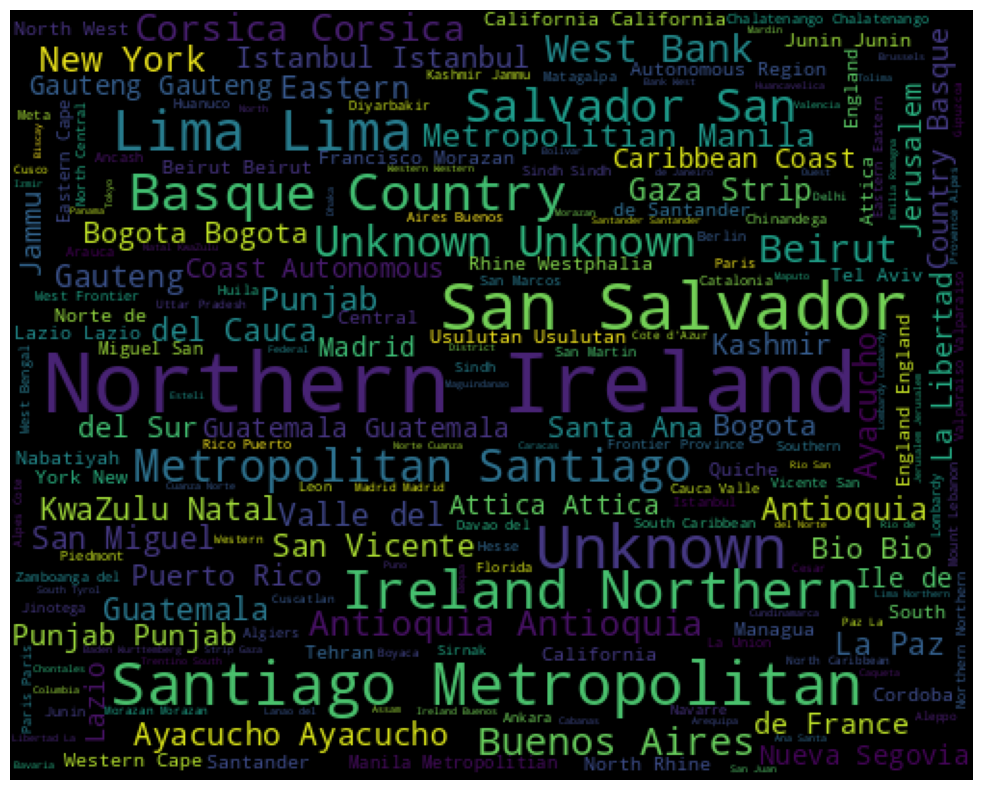

In [104]:
from wordcloud import WordCloud
from scipy import signal
cities = global_terror.state.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 500,
                     height = 400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [105]:
global_terror['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    3721
1989    4324
1990    3887
1991    4683
1992    5071
1994    3135
Name: Year, dtype: int64

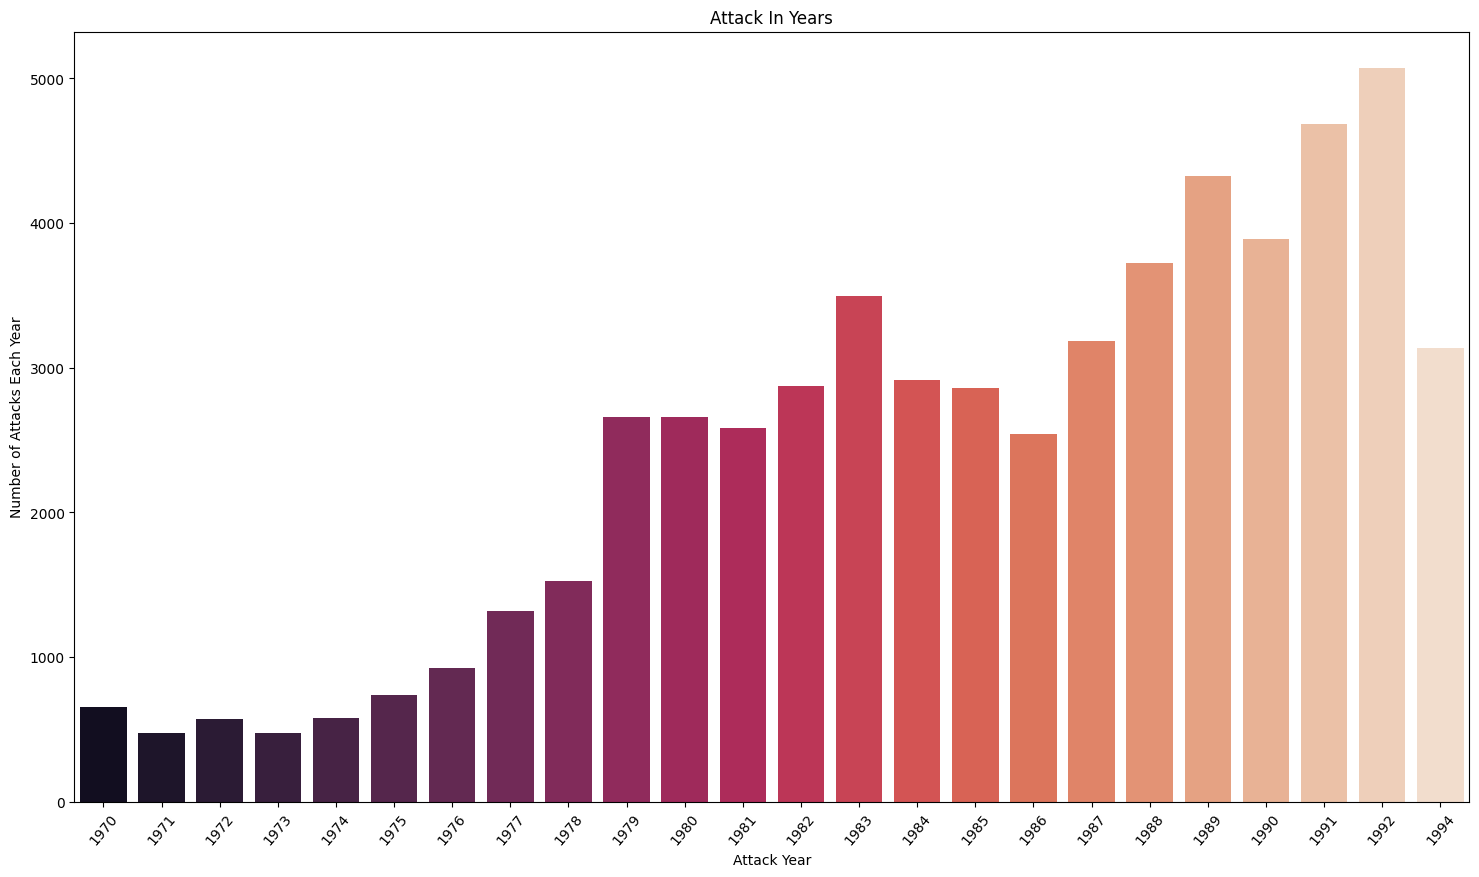

In [106]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

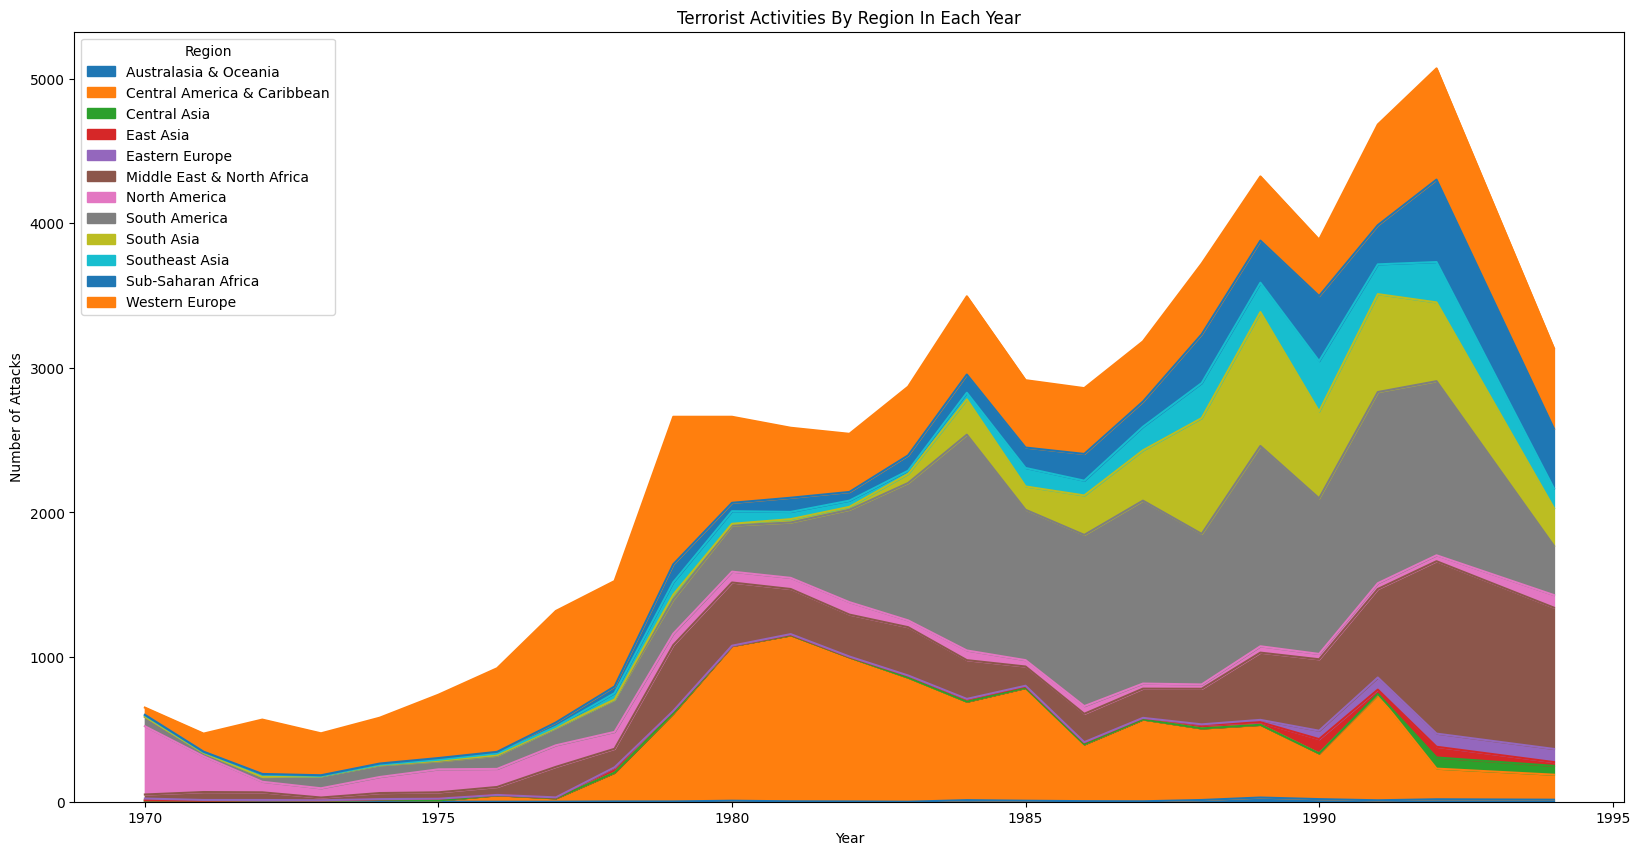

In [107]:
pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [108]:
global_terror['Wounded'] = global_terror['Wounded'].fillna(0).astype(int)
global_terror['Killed'] = global_terror['Killed'].fillna(0).astype(int)
global_terror['Casualities'] = global_terror['Killed'] + global_terror['Wounded']

global_terror1 = global_terror.sort_values(by='Casualities',ascending=False)[:50] 
heat=global_terror1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1973,1976,1978,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994
Country,,,,,,,,,,,,,,,,,
Angola,0.0,0.0,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,185.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,321.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colombia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285.0,0.0,198.0,0.0,0.0


In [109]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1982 to 2017',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [110]:
global_terror.Country.value_counts()[:21]

Peru                        5855
El Salvador                 5302
Colombia                    4852
United Kingdom              3891
Spain                       2570
India                       2269
Chile                       2235
United States               2130
Turkey                      2108
Nicaragua                   1912
Guatemala                   1893
South Africa                1763
Philippines                 1751
Sri Lanka                   1715
France                      1715
Lebanon                     1677
Italy                       1411
Israel                       939
West Bank and Gaza Strip     787
Argentina                    744
Pakistan                     632
Name: Country, dtype: int64

In [111]:
import folium
from folium.plugins import MarkerCluster
filterYear = global_terror['Year'] == 2001
filterData = global_terror[filterYear] 
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()

In [112]:
map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

From the above map, we can depict that the maximum attacks carried out was on the African Continent. Then, the continent South America faced the highest number of attacks.

In [113]:
global_terror.Group.value_counts()[1:20]

Shining Path (SL)                                   4396
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2604
Basque Fatherland and Freedom (ETA)                 1652
Palestinians                                        1079
New People's Army (NPA)                              964
Nicaraguan Democratic Force (FDN)                    895
Revolutionary Armed Forces of Colombia (FARC)        882
National Liberation Army of Colombia (ELN)           877
Kurdistan Workers' Party (PKK)                       854
Manuel Rodriguez Patriotic Front (FPMR)              822
Sikh Extremists                                      715
Liberation Tigers of Tamil Eelam (LTTE)              630
African National Congress (South Africa)             605
M-19 (Movement of April 19)                          551
Tupac Amaru Revolutionary Movement (MRTA)            548
Corsican National Liberation Front (FLNC)            459
People's Liberation Front (JVP)

In [114]:
test = global_terror[global_terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico'],
      dtype=object)

In [115]:
global_terror_df_group = global_terror.dropna(subset=['latitude','longitude'])
global_terror_df_group = global_terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = global_terror.Group.value_counts()[1:8].index.tolist()
global_terror_df_group = global_terror_df_group.loc[global_terror_df_group.Group.isin(terrorist_groups)]
print(global_terror_df_group.Group.unique())

["New People's Army (NPA)" 'Palestinians' 'Irish Republican Army (IRA)'
 'Basque Fatherland and Freedom (ETA)' 'Shining Path (SL)'
 'Farabundo Marti National Liberation Front (FMLN)'
 'Nicaraguan Democratic Force (FDN)']


In [116]:
map = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(global_terror_df_group)):
    folium.Marker([global_terror_df_group.iloc[i]['latitude'],global_terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(global_terror_df_group.iloc[i]['Group'], 
                  global_terror_df_group.iloc[i]['Country'])).add_to(map)
map

In [117]:
m1 = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(global_terror_df_group)):
    marker=folium.Marker([global_terror_df_group.iloc[i]['latitude'],global_terror_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(global_terror_df_group.iloc[i]['Group'],
                                          global_terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
#folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [118]:
global_terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [119]:
killData = global_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))
attackData = global_terror.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

Number of people killed by terror attack: 107916


,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [120]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,62838,13669,21782,1345,445,572,1556,179,5530


In [121]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


In [122]:
global_terror.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0


In [123]:
countryData = global_terror.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,342,2,760,0,1269,0,486,17,11,21,...,0,0,481,97,1,35,15,45,69,136


In [124]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size


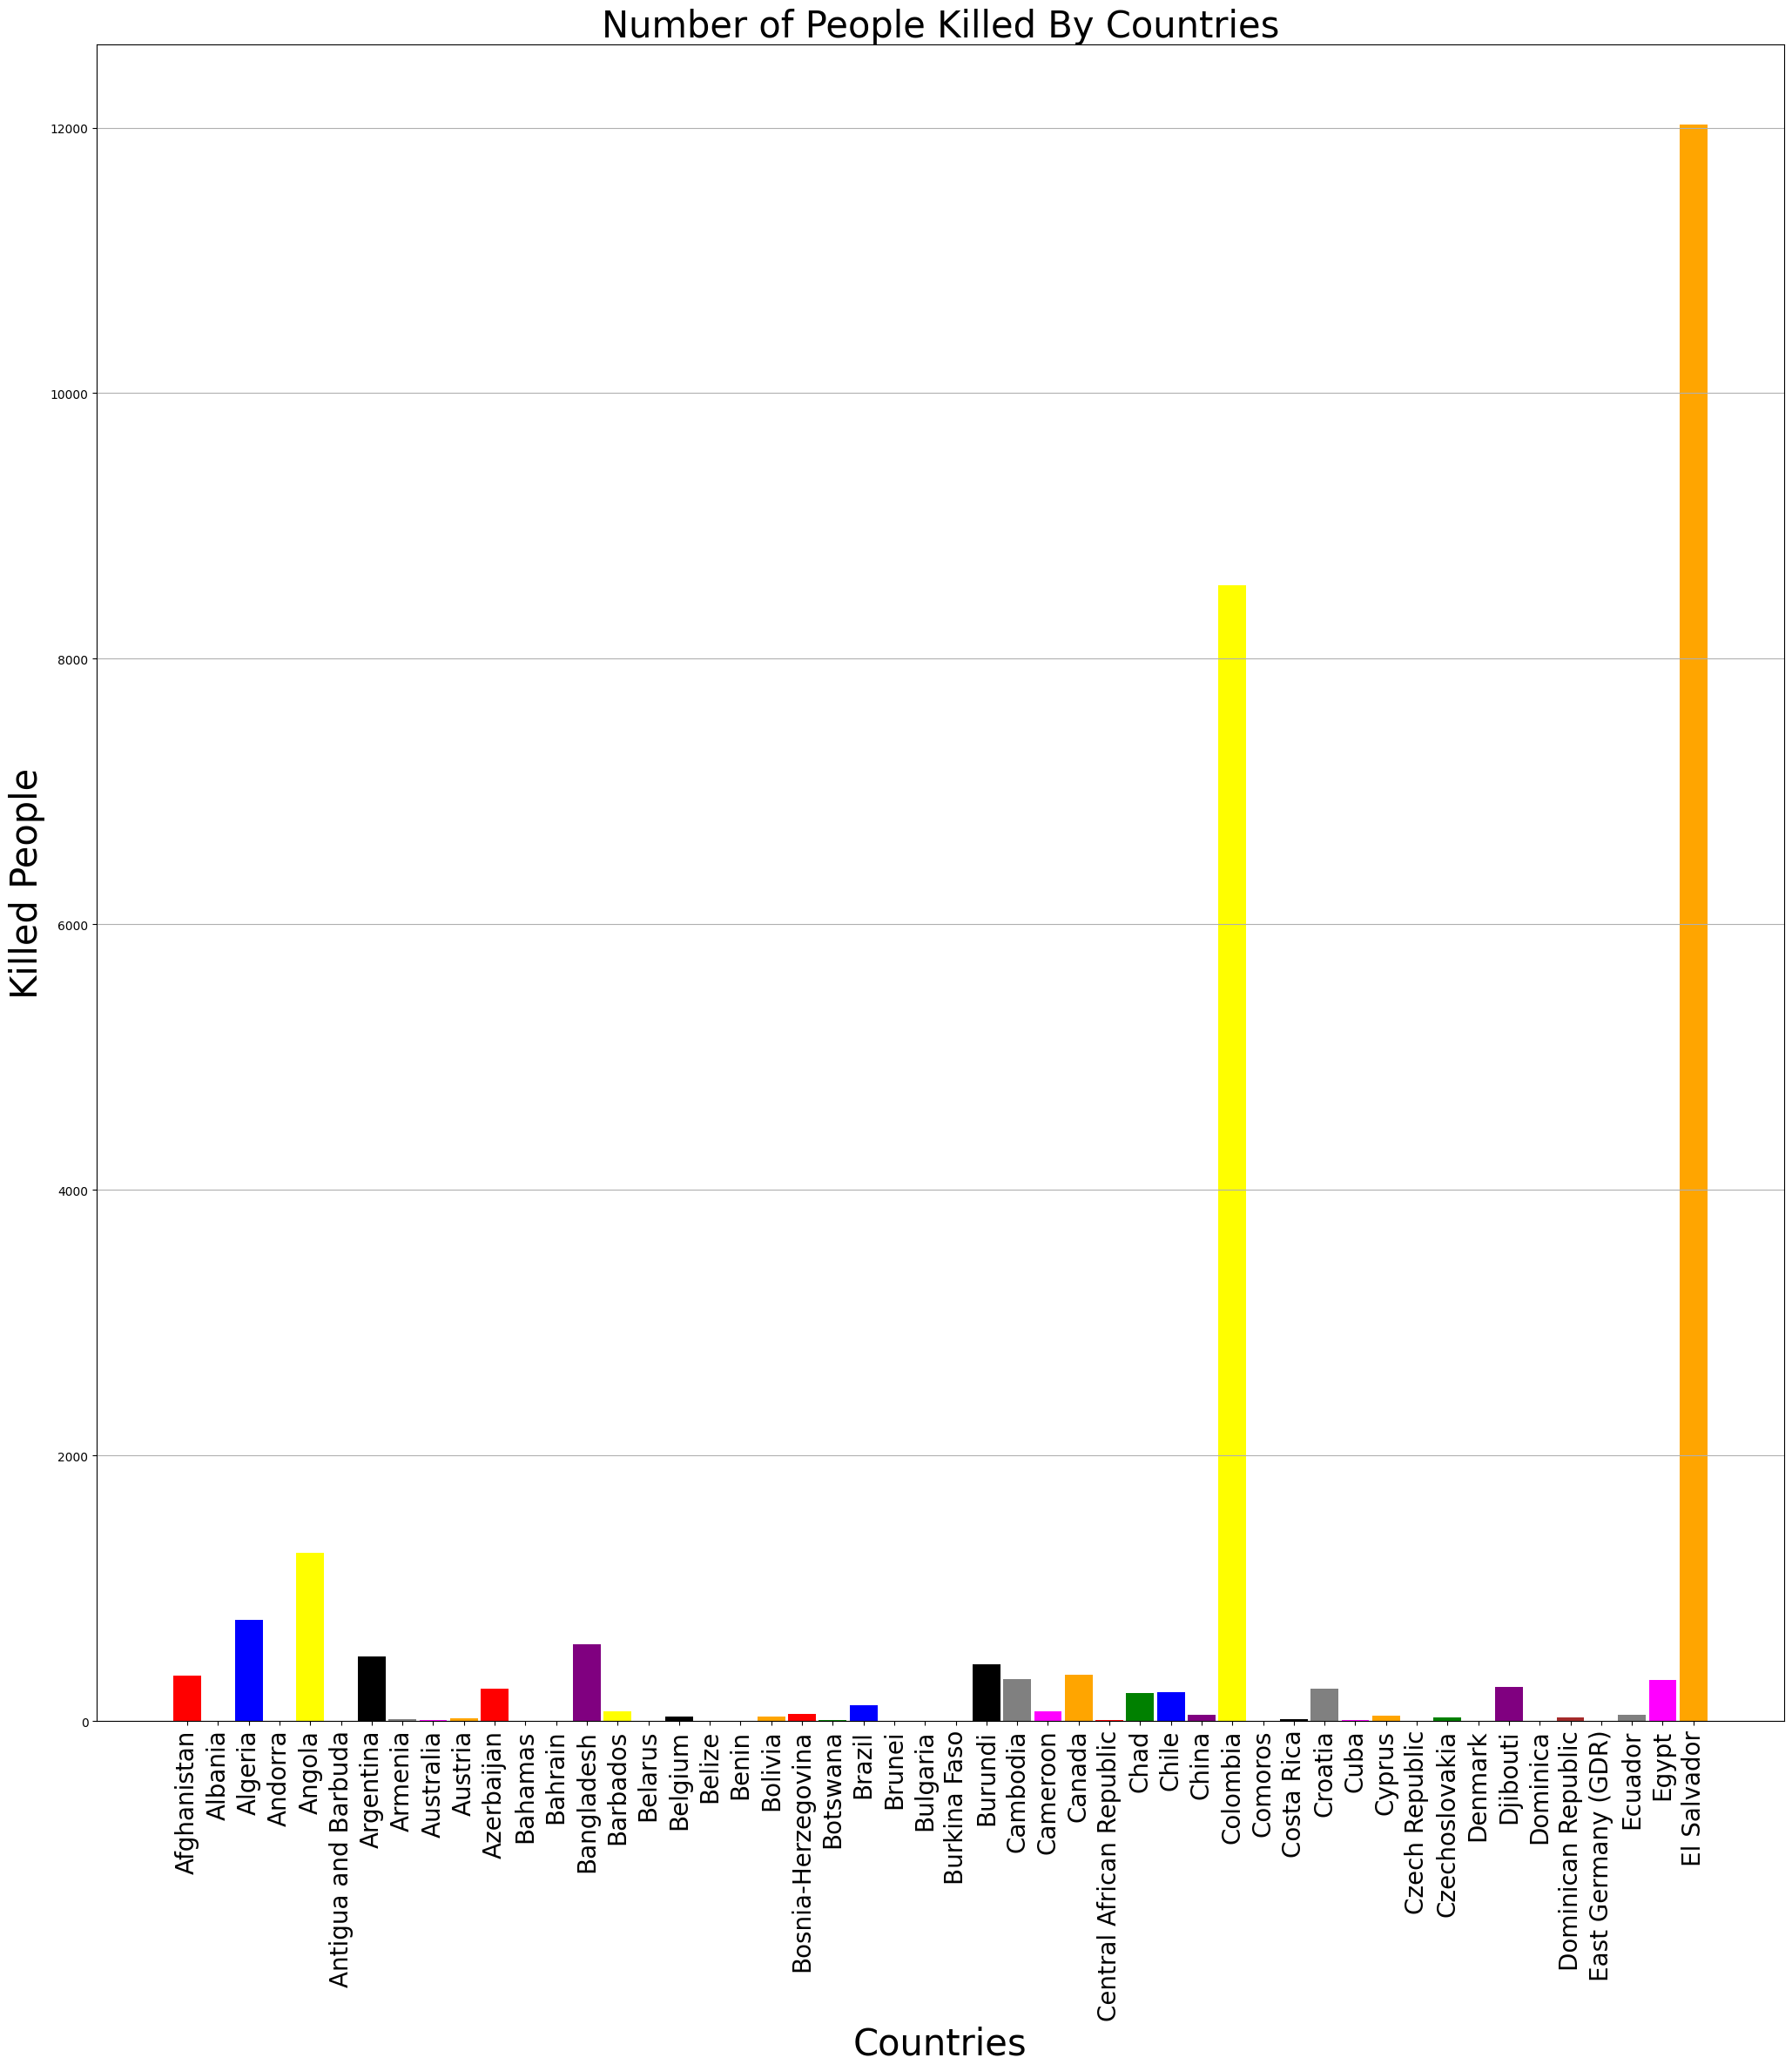

In [125]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
# print(fig_size)
plt.show()

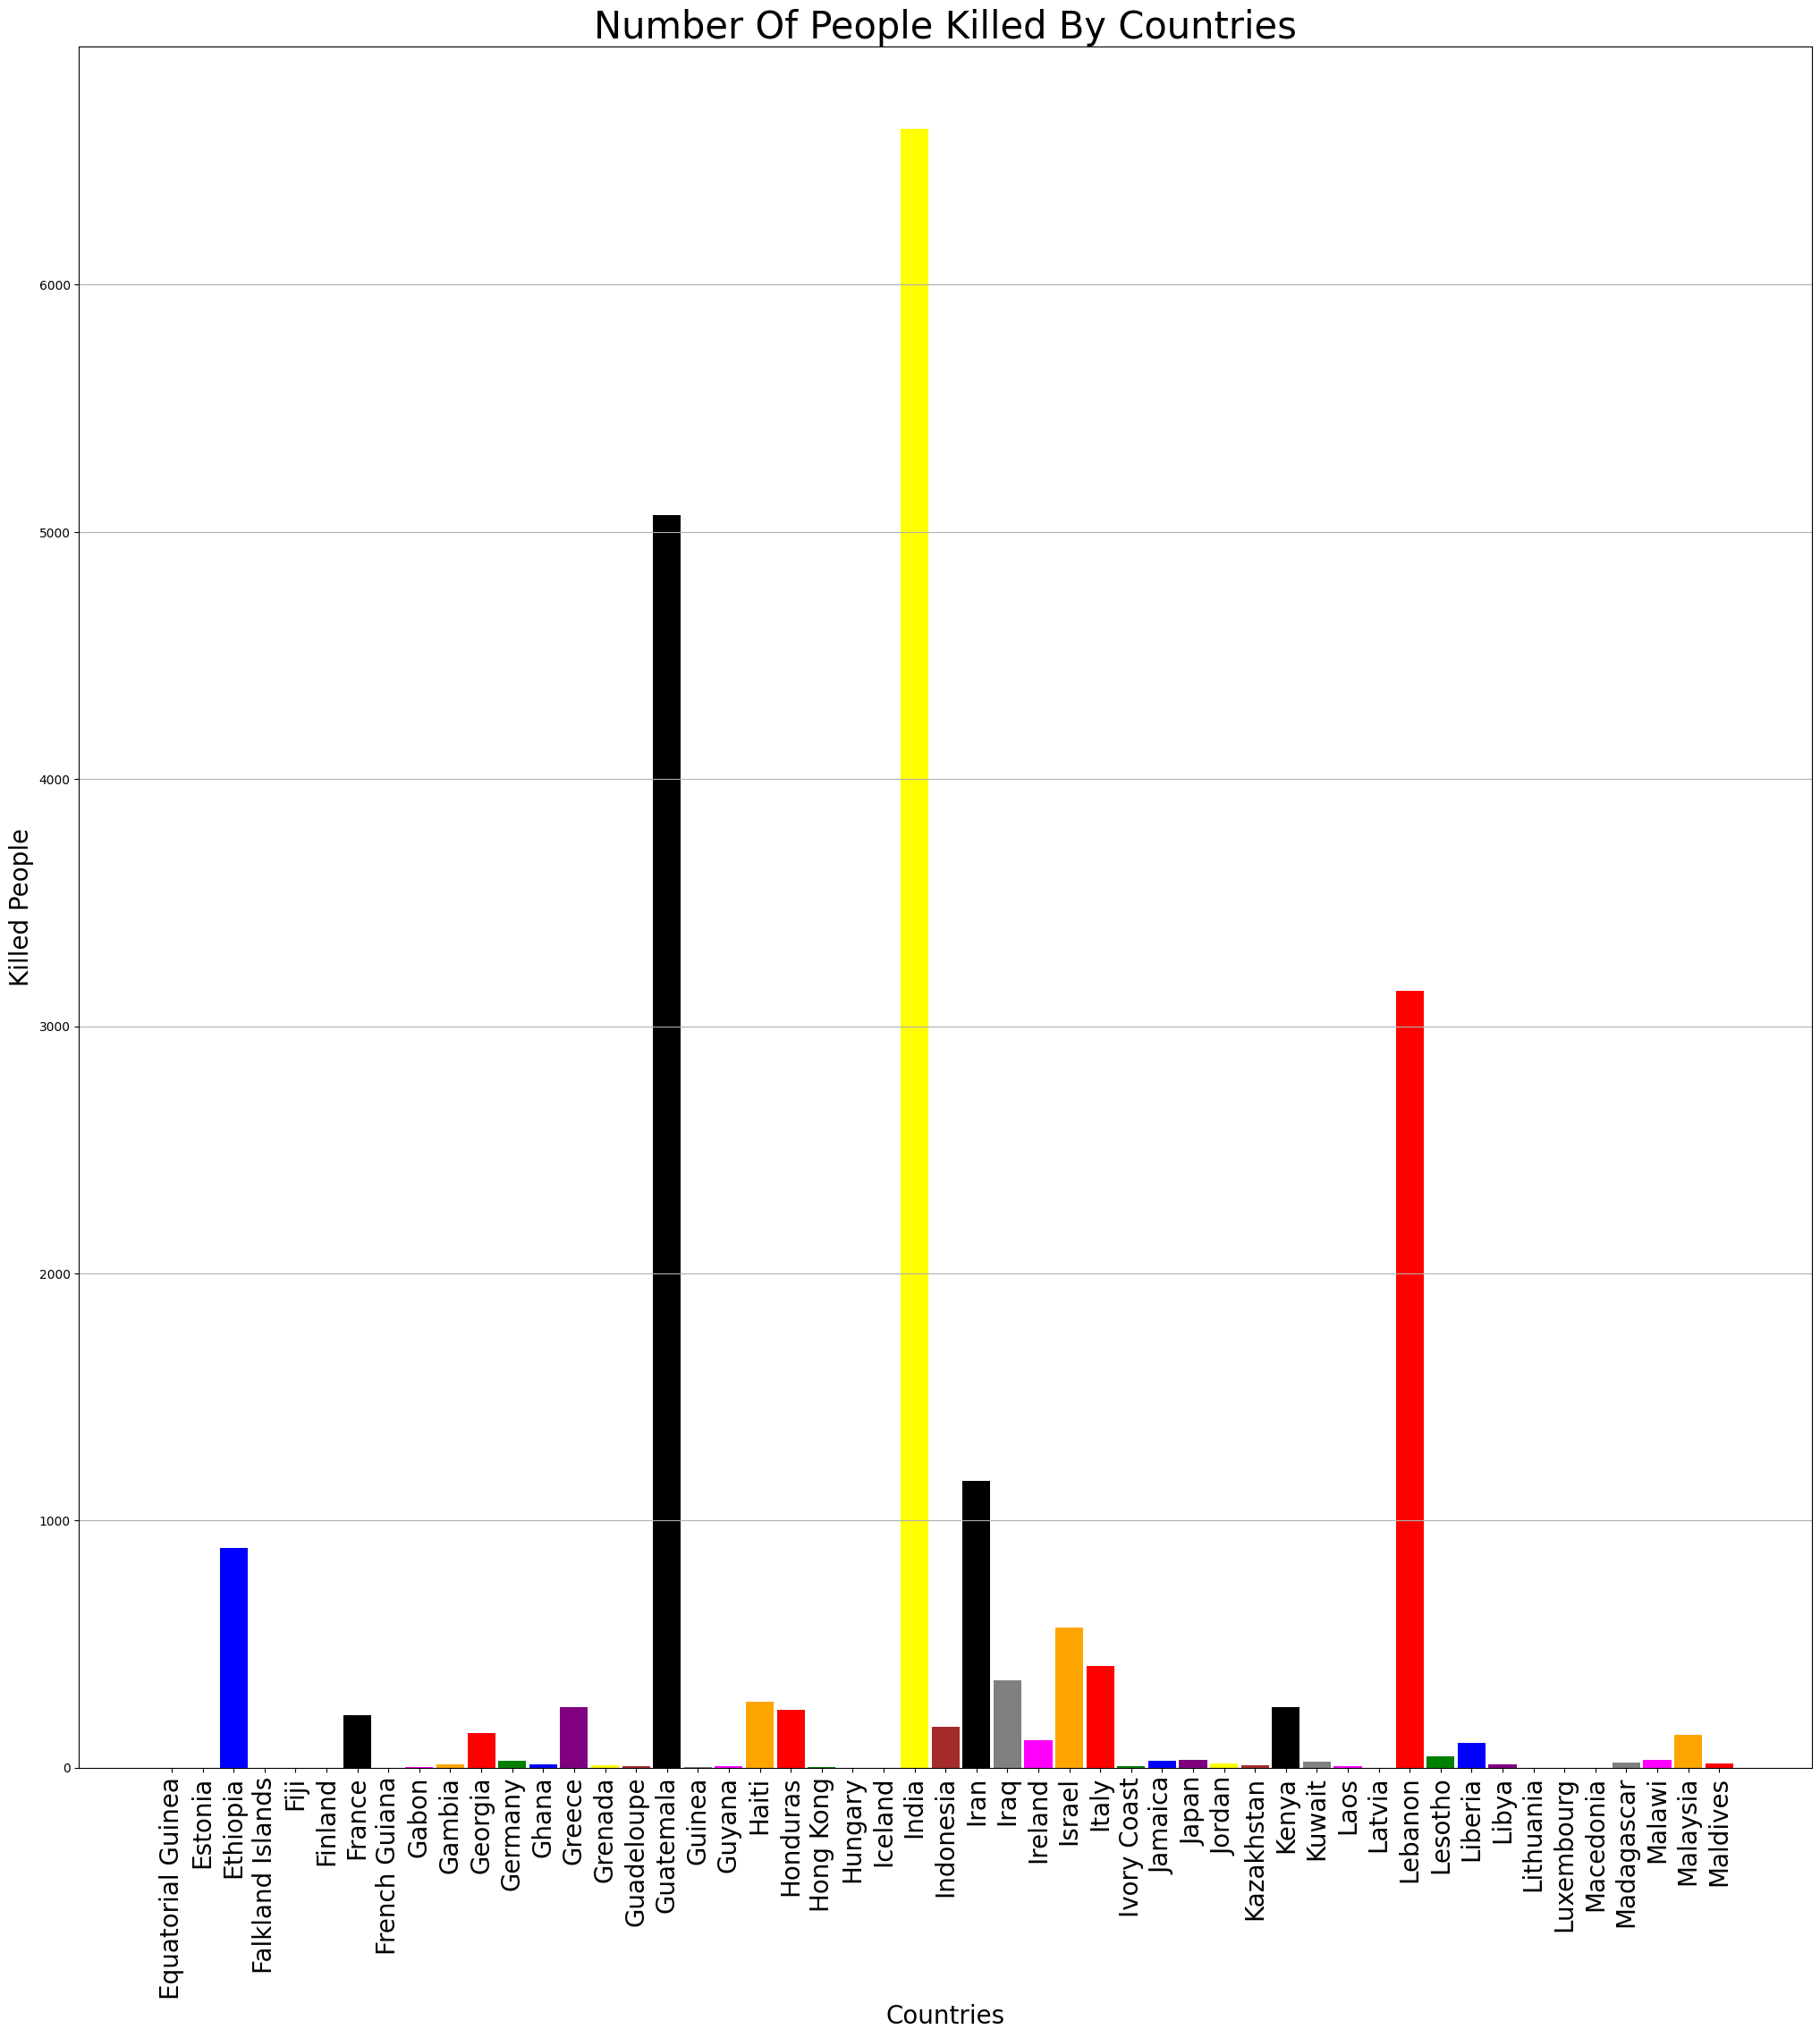

In [126]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of People Killed By Countries', fontsize = 30)
plt.show()

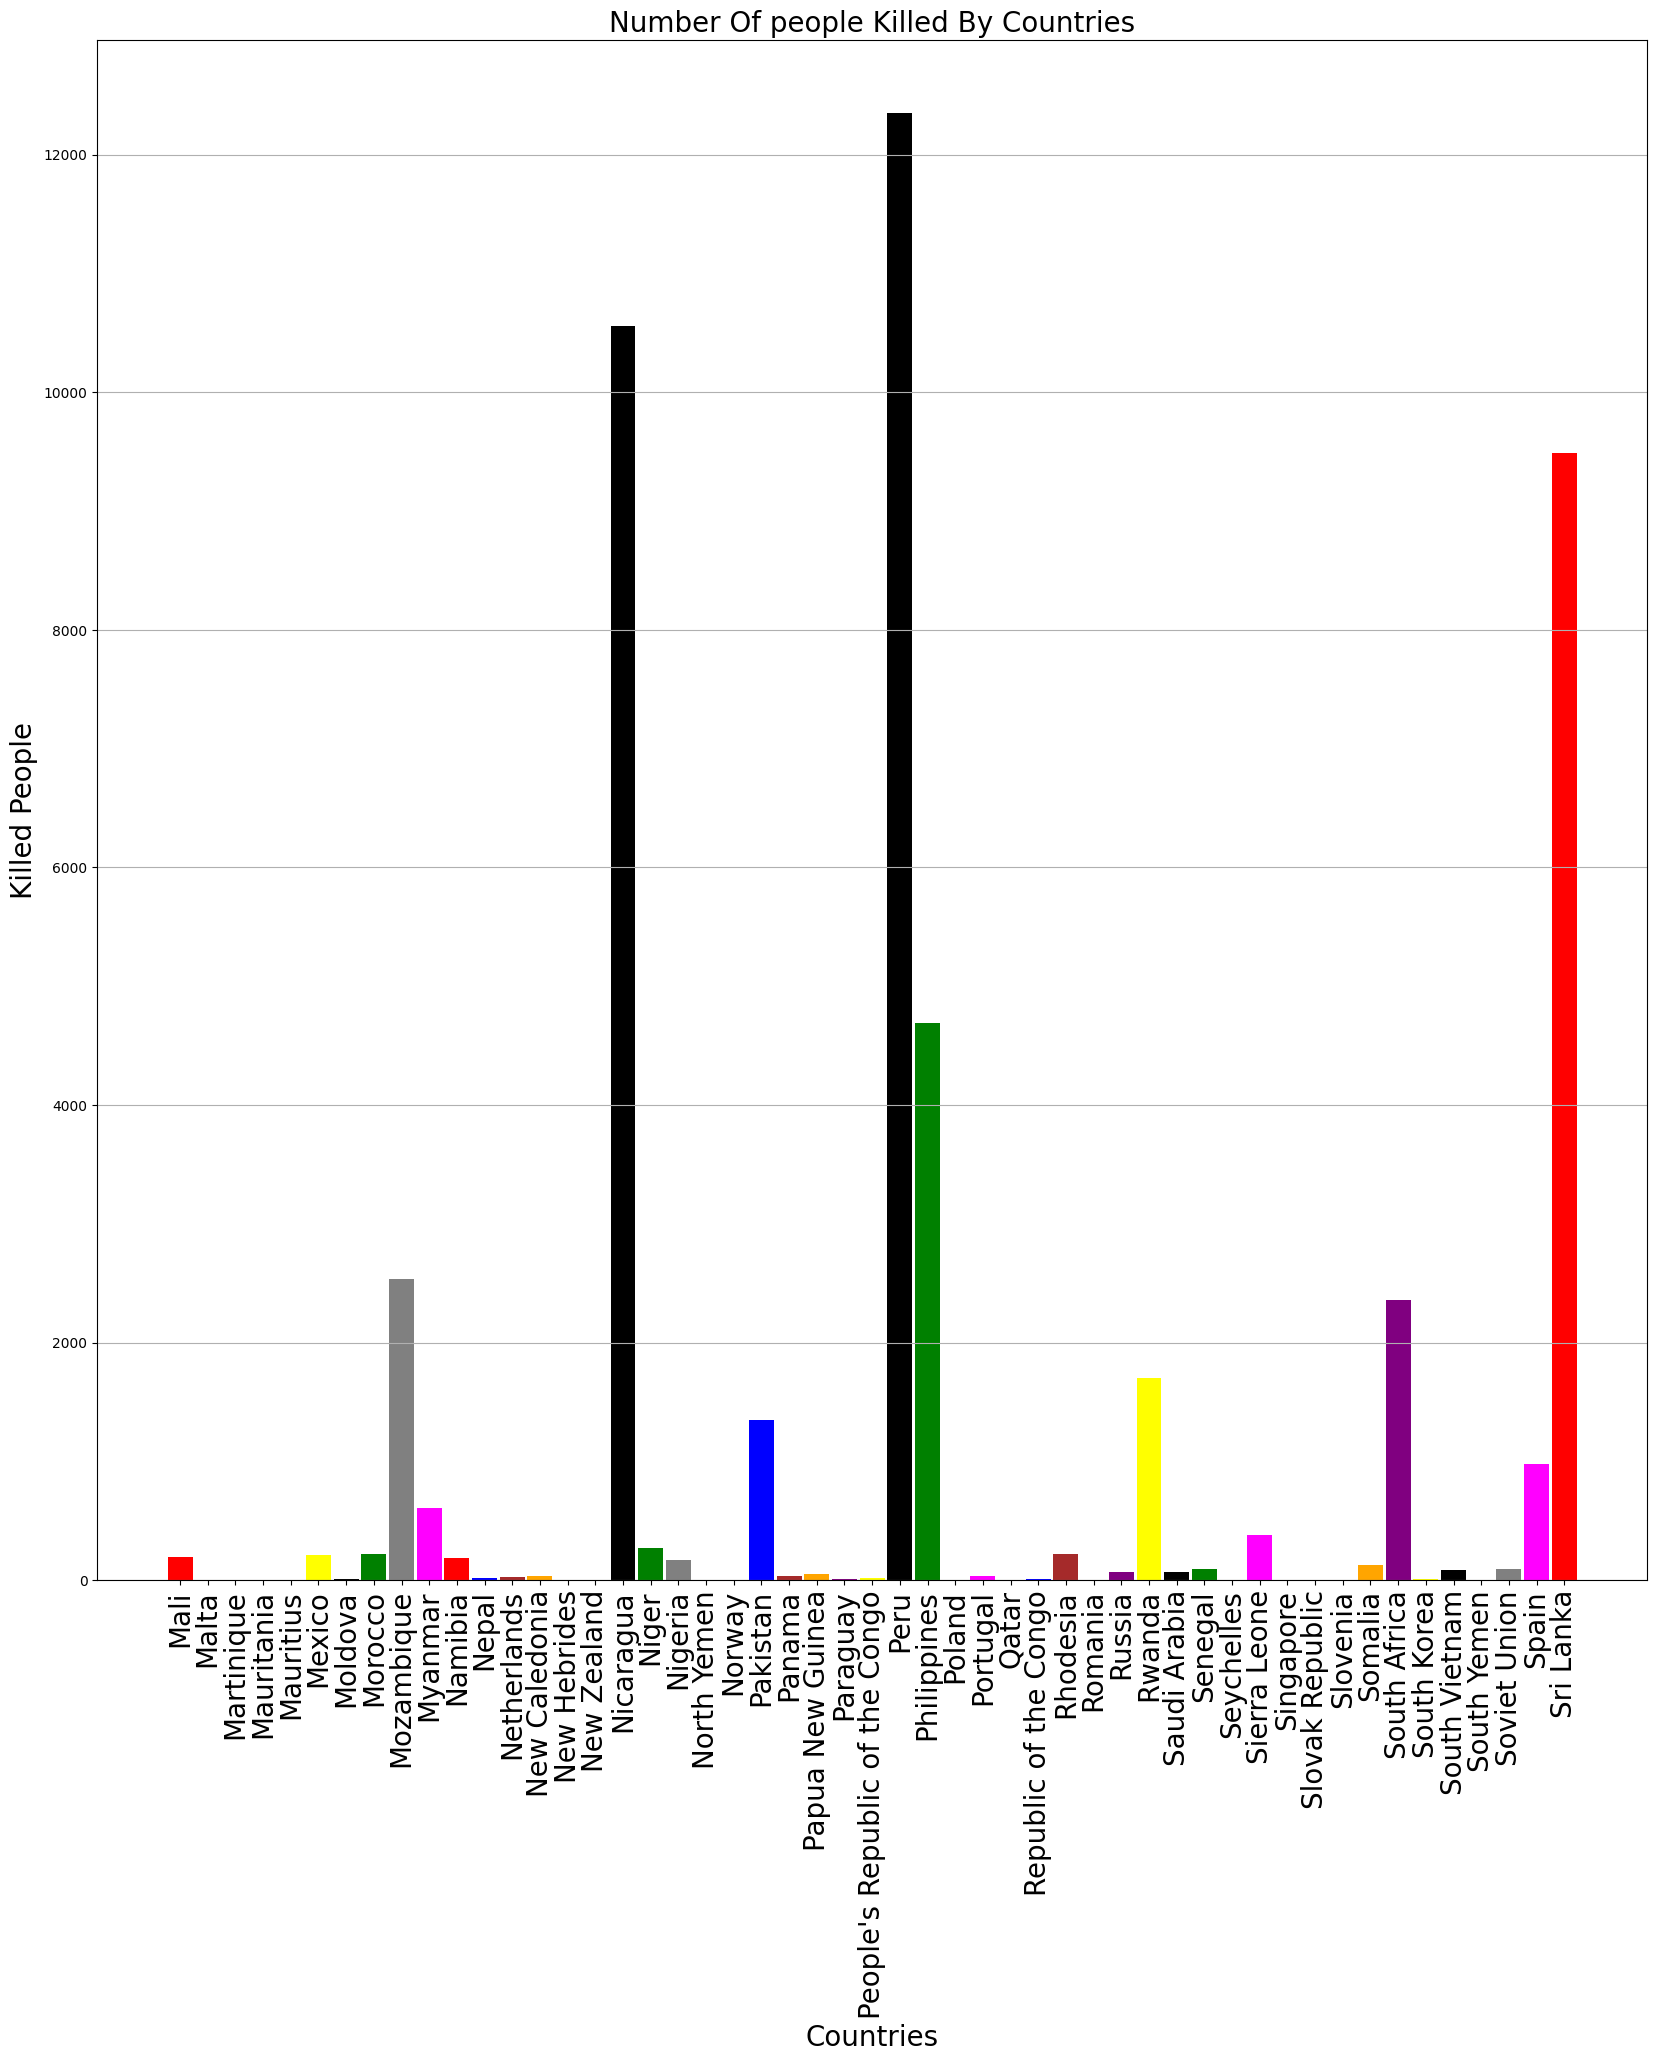

In [127]:
labels = countryKillFormatData.columns.tolist()
labels = labels[101:152]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[101:152]
values = [int(i[0]) for i in values]
colors = ['red', 'blue', 'brown', 'orange', 'purple', 'yellow', 'black', 'green', 'gray', 'magenta']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 20)
plt.show()

From the above graphs, we can see that the countries where most people are killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen naming a few. Even though there is a perception that Muslims are supporters of terrorism, but Muslims are the people who are most damaged by terrorist attacks.
So after different type of analyzation ,Overall terrorism is suddenly increased from 2010 and I have ranked the Hot zone in terms of terrorist activities in all regions 
